In [1]:
from pathlib import Path
import numpy as np
from ase.io import read as aseread
import matplotlib.pyplot as plt
from icecream import ic

%matplotlib inline

In [7]:
xyz_path = Path('data/AZ/os-rotation/AZ_os-DFT_rotation_path.xyz')

In [8]:
atoms_list = aseread(xyz_path, index=":")

In [9]:
len(atoms_list)

270

In [10]:
# get omega angle for plotting
omega = np.array([x.get_dihedral(0, 11, 12, 13)  for x in atoms_list])

deg = 180.0 / np.pi
omega[omega > np.degrees(np.pi)] -= np.degrees(2 * np.pi )
omega = -omega

In [ ]:
npy_path = Path('data/AZ/os-rotation')
prefix = 'os_iso'

In [20]:
npy_dict = {
    'amber': npy_path / f'{prefix}_E_amber_kcal_mol.npy',
    'QM': npy_path / f'{prefix}_E_QM_kcal_mol.npy',
    'torchani': npy_path / f'{prefix}_E_torchani_kcal_mol.npy',
    'hippynn': npy_path / f'{prefix}_E_hippynn_kcal_mol.npy',
    'sage': npy_path / f'{prefix}_E_sage_kcal_mol.npy'
}

In [54]:
# load all energies
E_hippynn = np.load(npy_dict['hippynn'], allow_pickle=True)
E_QM = np.load(npy_dict['QM'], allow_pickle=True)
E_torchani = np.load(npy_dict['torchani'], allow_pickle=True)
E_sage = np.load(npy_dict['sage'], allow_pickle=True)
E_amber = np.load(npy_dict['amber'], allow_pickle=True)

E_QM_CS = np.load(npy_path / 'cs_rotation_E_QM_kcal_mol.npy', allow_pickle=True)

In [11]:
E_hippynn

NameError: name 'E_hippynn' is not defined

In [55]:
E_torchani

array([0.00000000e+00, 0.00000000e+00, 8.60257016e-04, 2.30960303e-03,
       4.09557146e-03, 6.21161674e-02, 1.05671355e-01, 7.75540408e-02,
       7.76007939e-02, 8.20984420e-02, 2.04647665e-01, 1.20697801e-01,
       5.54903183e-01, 7.84629210e-01, 7.84750768e-01, 8.24509604e-01,
       8.64951035e-01, 9.06112463e-01, 9.47909734e-01, 9.90511158e-01,
       1.03373907e+00, 1.07778984e+00, 1.12277567e+00, 1.16869657e+00,
       1.21603876e+00, 1.26454042e+00, 1.31440728e+00, 1.36612556e+00,
       1.41954565e+00, 1.47458340e+00, 1.53198685e+00, 1.59104537e+00,
       1.65243218e+00, 1.71605380e+00, 1.78191022e+00, 1.85029130e+00,
       1.92118770e+00, 1.99475838e+00, 2.07091917e+00, 2.15010022e+00,
       2.23217996e+00, 2.31727060e+00, 2.40523188e+00, 2.49624147e+00,
       2.59045831e+00, 2.68777021e+00, 2.78839223e+00, 2.89213736e+00,
       2.99900559e+00, 3.10928680e+00, 3.22242930e+00, 3.34004140e+00,
       3.45407221e+00, 3.58106298e+00, 3.73172951e+00, 3.86001067e+00,
      

In [23]:
print(max(E_sage), max(E_amber)) # barrier in FFs

13.583609574406566 20.67751653021039


In [31]:
max(E_QM_CS)

57.88607351598661

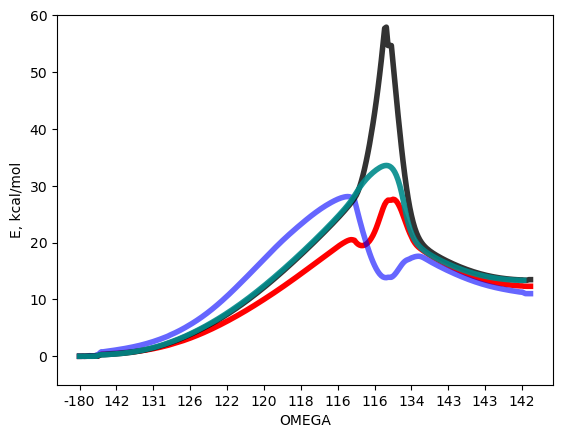

In [60]:
import matplotlib.ticker as ticker
formatter = ticker.FormatStrFormatter('%.0f')

fig, ax1 = plt.subplots()

ax1.set_ylim(-5, 60)
ax1.set_ylabel('E, kcal/mol')
ax1.set_xlabel('OMEGA')


ax1.plot(E_hippynn, label = 'hippynn', color = 'red', linewidth = 4)
# ax1.plot(E_amber, label = 'amber', linewidth = 4, alpha = 0.6, linestyle = 'dashed', color = 'grey')
# ax1.plot(E_sage, label = 'sage', linewidth = 4, alpha = 0.6, linestyle = 'dashed', color = 'orange')
ax1.plot(E_torchani, label = 'torchani', color = 'blue', linestyle = 'solid', linewidth = 4, alpha = 0.6)

ax1.plot(E_QM_CS, label = 'black', linewidth = 4, alpha = 0.8, linestyle = 'solid', color = 'black')
ax1.plot(omega.astype('str'), E_QM, label = 'DFT closed-shell', color = 'darkcyan', linewidth = 4, alpha = 0.9,)

tick_positions = np.arange(0, len(omega), 22)
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(f'{x:.0f}' for x in omega[tick_positions])


plt.savefig('azo_rotational_profile_open-shell_final.png', dpi=300)
plt.show()